# Linear Regression Example

### Make datasets and test set
#### data points are sampled from a curve y= x+ 20*sin(x/10).<br>make sure the shape of the data matrix with which you feed to the tensor correspond to the shape of the tensor

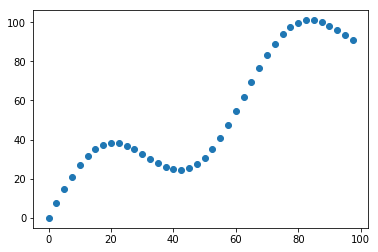

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline
# Define input data
X_data = np.arange(100, step=2.5)
y_data = X_data + 20 * np.sin(X_data/10)
# Plot input data
plt.scatter(X_data, y_data)

n_samples = int(100/2.5)
# Tensorflow is picky about shapes, so resize
X_data = np.reshape(X_data, (n_samples,1))
y_data = np.reshape(y_data, (n_samples,1))

X_test = np.random.rand(200)*120
X_test = X_test.reshape(-1, 1)

### Creating the graph and run it
#### In Graph building stage, python call tensorflow api to create Tensorflow Nodes and connect those Nodes. (at this moment the graph is static)<br>Note that in tensorflow Graph, <FONT COLOR="green">Nodes</FONT> are called <FONT COLOR="green">Operations</FONT> and <FONT COLOR="red">Edges</FONT> connect those Nodes are called <font color="red">tensors</font> 
#### A fetch on a tensor would require its preceeding Node to activate,  for a Node to activate would require all it's inbound tensors/Edges to be filled with data, recursively all the way to the leaf Nodes (placeholder, variable, constant)

In [19]:
################Graph building stage################
# Define placeholders for input
X = tf.placeholder(tf.float32, shape=(None, 1))
y = tf.placeholder(tf.float32, shape=(None, 1)) 

# Define variables to be learned
with tf.variable_scope("linear_regression"):
    W = tf.Variable(np.random.rand(1, 1), 'weight', dtype=tf.float32)
    b = tf.Variable(np.random.rand(1, 1), 'bias', dtype=tf.float32)
    
    y_pred = tf.matmul(X, W) + b
    loss = 1./2 * tf.reduce_mean((y - y_pred)**2)

opt = tf.train.AdamOptimizer(10.)
opt_operation = opt.minimize(loss)
####################end of building graph###########
animation_fram = []
################Run/fetch the graph#################
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in xrange(500):
        _, loss_val = sess.run([opt_operation, loss], feed_dict={X: X_data, y: y_data})
        predict = sess.run(y_pred, feed_dict={X: X_test})
        animation_fram.append((X_test, predict, loss_val))

### Visualizing the fitting process

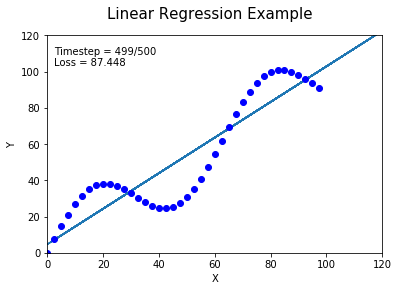

In [20]:

f, ax = plt.subplots(figsize=(6,4))
f.suptitle('Linear Regression Example', fontsize=15)
plt.ylabel('Y')
plt.xlabel('X')
ax.set_xlim(0, 120)
ax.set_ylim(0, 120)

line_d, = ax.plot([], [], label='fit_line')
dots, = ax.plot([], [], 'bo', label='actual_dots')

frame_text = ax.text(0.02, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes)
# ax.legend()

def init():
    line_d.set_data([],[])
    dots.set_data([],[])
    return (line_d,) + (dots,)

def animate(i):
   
    line_d.set_data(animation_fram[i][0], animation_fram[i][1])

    dots.set_data(X_data, y_data)
    frame_text.set_text('Timestep = %.1d/%.1d\nLoss = %.3f' % (i, len(animation_fram), animation_fram[i][2]))
    
    return (line_d,) + (dots,)

anim = animation.FuncAnimation(f, animate, init_func=init,
                               frames=len(animation_fram), interval=30, blit=True)

HTML(anim.to_html5_video())



In [1]:
import tensorflow as tf

In [2]:
opt = tf.train.GradientDescentOptimizer(0.01)
train_op = opt.minimize(loss)

$$\theta-\lambda*\Delta\theta$$